# Single Variable Calculus 

**draft version of notes**
**disclaimer: these notes are very much in their initial stages, typos and erros may be present.**
**notice: you do not have permission to distribute these notes** 

## Derivatives 
The truth is you don't need that much calculus for machine learning. Hooray! We rarely need to use the integral, so I won't even cover that here (perhaps another day). Derivatives are important. But the least important thing about a derivative is all those rules you memorized to compute the derivative (product rule, quotient rule, etc). **The most important thing is understanding the concept of the derivative.** 

The derivative of $f(x)$ is 
\begin{equation} 
\frac{df}{dx} = \lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}. 
\end{equation} 

Conceptually, a good way to understand the derivative is 
\begin{align} 
\frac{df}{dx} = \lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x} = \text{the slope of the line tangent to the $f(x)$ curve} . 
\end{align} 

In [1]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt 
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML


import sympy as sym 
from scipy.special import factorial 

from IPython.display import Javascript, HTML, display
%load_ext jsxgraph-magic

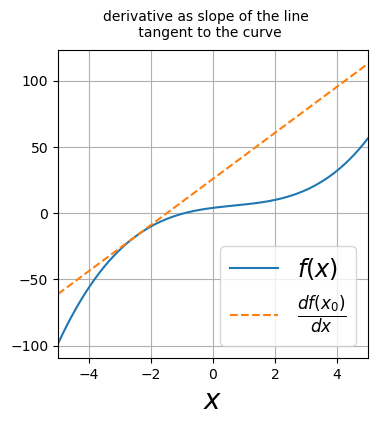

In [2]:
f = lambda x: .5*x**3 -x**2 +3*x + 4
df = lambda x: 1.5*x**2-2*x +3 

x=np.linspace(-5,5,1000) 

# Point at which to calculate the tangent line 
x0 = -2.5
y0 = f(x0)

# Slope of the tangent line at x = x0
slope = df(x0)

tangent =slope*(x - x0) + y0

fig = plt.figure(figsize=(4,4))
fig.suptitle("derivative as slope of the line \n tangent to the curve", size=10) 
ax = fig.add_subplot()
ax.set_xlim(x[0], x[-1]) 
ax.set_xlabel(r"$x$", size=20) 
ax.plot(x, f(x), label=r"$f(x)$")
ax.plot(x, tangent,"--", label=r"$\frac{df(x_0)}{dx}$" ) 
ax.legend(loc=4, fontsize="xx-large") 
ax.grid()



Above is a plot illustrating the slope of the line tangent to the curve. **Below** is an interactive plot to visualize the derivative as the slope of the line tangent to the curve. With your cursor, grab the red dot labeled $x_0$ and drag it along the x-axis. The slope of the line tangent to the curve will be shown for each point you slide across. 

In [3]:
# %%jsxgraph -w 600 -h 400 df_tangent
#     var board = JXG.JSXGraph.initBoard('df_tangent', {boundingbox: [-3, 5, 3, -8],axis: true });
# // 1. Define the Function and its Derivative
#         const f = function(x) {
#             return .3*x**4 - .1*x**3 -2*x**2 -.8*x -2; // Example function: f(x) = 0.5x^2 - 2
#         };
#         const fPrime = function(x) {
#             return 1.2*x**3-.3*x**2 -4*x -.8;             // Derivative of f(x)
#         };
#         //var fPrime = JXG.Math.Numerics.D(f);  // Alternative: Numerical derivative

#         // 2. Plot the Function
#         var graph = board.create('functiongraph', [f, -3, 3], {
#             strokeColor: 'blue',
#             strokeWidth: 2,
#             name: 'f(x)',
#             withLabel: true
#         });

#         // 3. Create a Point on the Curve
#         var xPoint = board.create('glider', [0, 0, board.defaultAxes.x], {
#             name: 'x0',
#             size: 3,
#             color: 'red',
#             label: {fontSize: 18}
#         });
#         var pointOnCurve = board.create('point', [
#             function() { return xPoint.X(); },
#             function() { return f(xPoint.X()); }
#         ], {
#             name: 'f(x_0)',
#             color: 'black',
#             fixed: true, 
#             label: {fontSize: 18},
#         });

#         // 4. Calculate the Tangent Line Slope
#         const getTangentSlope = function() {
#             return fPrime(xPoint.X());
#         };

#         // 5. Display the Slope as a Tangent Line
#         var tangentLine = board.create('line', [pointOnCurve, [
#             function() { return xPoint.X() + 1; },  // A point slightly to the right
#             function() { return f(xPoint.X()) + getTangentSlope(); } // y = f(x0) + f'(x0)
#         ]], {
#             strokeColor: 'green',
#             strokeWidth: 2,
#             name: 'tangent',
#             withLabel: false
#         });

#         // 6. Display the Slope Value as Text
#         var slopeText = board.create('text', [-2, 4, function() {
#             return "Slope: " + getTangentSlope().toFixed(2);
#         }], {
#             anchorX: 'left',
#             anchorY: 'top',
#             fontSize: 16,
#             color: 'green'
#         });
        

                              

```{raw} html
<div id="df_tangent" style="width:600px; height:400px;"></div>
<script src="https://cdn.jsdelivr.net/npm/jsxgraph/distrib/jsxgraphcore.js"></script>
<script>
var board = JXG.JSXGraph.initBoard('df_tangent', {boundingbox: [-3, 5, 3, -8], axis: true});

const f = function(x) {
    return 0.3*x**4 - 0.1*x**3 - 2*x**2 - 0.8*x - 2;
};
const fPrime = function(x) {
    return 1.2*x**3 - 0.3*x**2 - 4*x - 0.8;
};

var graph = board.create('functiongraph', [f, -3, 3], {
    strokeColor: 'blue',
    strokeWidth: 2,
    name: 'f(x)',
    withLabel: true
});

var xPoint = board.create('glider', [0, 0, board.defaultAxes.x], {
    name: 'x0',
    size: 3,
    color: 'red',
    label: {fontSize: 18}
});

var pointOnCurve = board.create('point', [
    function() { return xPoint.X(); },
    function() { return f(xPoint.X()); }
], {
    name: 'f(x_0)',
    color: 'black',
    fixed: true, 
    label: {fontSize: 18},
});

const getTangentSlope = function() {
    return fPrime(xPoint.X());
};

var tangentLine = board.create('line', [pointOnCurve, [
    function() { return xPoint.X() + 1; },
    function() { return f(xPoint.X()) + getTangentSlope(); }
]], {
    strokeColor: 'green',
    strokeWidth: 2,
    name: 'tangent',
    withLabel: false
});

var slopeText = board.create('text', [-2, 4, function() {
    return "Slope: " + getTangentSlope().toFixed(2);
}], {
    anchorX: 'left',
    anchorY: 'top',
    fontSize: 16,
    color: 'green'
});
</script>
```

**Above, the red dot marks the point of interest on the graph. You may slide the red dot along the x-axis to see how the slope, i.e., the derivative, changes.** As you slide the red dot along the x-axis, you will pass through two minima and one maxima. 

We now build our **intuition for the limit**. Imagine evaluating the function at two points, $x_0$ and $x_0 + \Delta x$; $f(x_0)$ and $f(x_0 + \Delta x)$. We subtract the two and divide by $\Delta x$ to obtain the slope $\frac{f(x_0 + \Delta x) - f(x_0)}{\Delta x}$. We then let $\Delta x$ continuously decrease to zero. The animation below illustrates this idea by continuously decreasing $\Delta x$. As $\Delta x$ approaches zero, the slope $\frac{f(x_0 + \Delta x) - f(x_0)}{\Delta x}$ eventually becomes the line tangent to the curve.

In [4]:

# -------------------- animation code ------------------------------

# function evaluated at x0
f0= f(x0) 
# array of dx values 
dx=np.array([3, 3/2, 3/4, 3/8, 3/16, 3/32]) 
n_frames = dx.size 

fig = plt.figure(figsize=(6,6))
fig.suptitle("annimating the limit concept", size=30) 
ax = fig.add_subplot()
ax.set_xlim(x[0], x[-1]) 
ax.set_xlabel(r"$x$", size=20) 
ax.plot(x, f(x), label=r"$f(x)$")

y_offset = 10 # for plotting labe underneath the point
ax.plot([x0], [f0-y_offset], marker=r"$f(x_0)$", markersize=30, color="black", alpha=.5)

ln, =ax.plot([], [], alpha =.5) 
pts, = ax.plot([], [], "o", color="red") 
txt, =ax.plot([], [], marker=r"$f(x_0 + \Delta x)$", markersize=60, color="black", alpha=.5)

ax.grid()
plt.tight_layout()
plt.close()

def init(): 

    ln.set_data([], []) 
    pts.set_data([], []) 
    txt.set_data([], []) 
    return ln, pts, txt, 

def draw(i): 

    x1= x0 + dx[i] 
    f1=f(x1) 

    slope = (f1-f0)/dx[i]

    tangent =slope*(x - x0) + y0
    
    ln.set_data(x, tangent) 

    pts.set_data([x0, x1], [f0, f1]) 

    txt.set_data([x1], [f1 + y_offset]) 
    
    return ln, pts, txt, 

anim = animation.FuncAnimation(fig, draw, frames=n_frames, interval=500, blit=True)

In [5]:
import matplotlib

matplotlib.rcParams['animation.writer'] = 'ffmpeg' 
matplotlib.rcParams['animation.codec'] = 'h264'

In [6]:
HTML(anim.to_jshtml())

## Extrema of a Function 

**The slope of the line tangent to the curve provides much information**. Here are some ideas worth remembering: 

* If the slope is positive, the derivative is positive, indicating that the function is increasing with increasing $x$
* If the slope is negative, the derivative is negative, indicating that the function is decreasing with increasing $x$
* If the slope is zero, the derivative is zero, indicating a critical point where the function may be at a minimum, maximum, or saddle point (inflection point)

**Saddle Points**

A **saddle point** (or inflection point with horizontal tangent) occurs when $f'(x) = 0$ but the point is neither a local minimum nor maximum. At a saddle point, the function changes from increasing to decreasing (or vice versa) but passes through a horizontal tangent line. These points often occur when $f''(x) = 0$ as well, making the second derivative test inconclusive.

**Steps to Find Minima and Maxima Using Derivatives**

1. **First Derivative**

To find the **minima** and **maxima**, we look for points where the slope of the line tangent to the curve is zero, i.e., where the **first derivative equals zero**.

Let the function be $f(x)$. Minima and maxima points are called extrema and they satisfy
\begin{equation}
f'(x) = 0.
\end{equation}

2. **Second Derivative Test**

Once we have the critical points from the first derivative, we use the **second derivative** to determine whether these points correspond to minima, maxima, or saddle points.

**Second Derivative Test**:
* If $f''(x) > 0$ at a critical point, the function is **concave up** at that point, and it is a **local minimum**.
* If $f''(x) < 0$ at a critical point, the function is **concave down** at that point, and it is a **local maximum**.
* If $f''(x) = 0$, the test is **inconclusive**. This could be a **saddle point** where the curvature changes.

**Example**

Consider the function
\begin{equation}
f(x) = x^3 - 3x^2 + 4.
\end{equation}

**Step 1: Find the first derivative**
\begin{equation}
f'(x) = 3x^2 - 6x
\end{equation}

**Step 2: Set the first derivative equal to zero to find the critical points**
\begin{equation}
3x^2 - 6x = 0
\end{equation}

Factor the equation:
\begin{equation}
3x(x - 2) = 0
\end{equation}

The critical points are
\begin{equation}
x = 0 \quad \text{and} \quad x = 2.
\end{equation}

**Step 3: Find the second derivative**
\begin{equation}
f''(x) = 6x - 6
\end{equation}

**Step 4: Use the second derivative to classify the critical points**

For $x = 0$:
\begin{equation}
f''(0) = 6(0) - 6 = -6
\end{equation}
Since $f''(0) < 0$, $x = 0$ is a **local maximum**.

For $x = 2$:
\begin{equation}
f''(2) = 6(2) - 6 = 6
\end{equation}
Since $f''(2) > 0$, $x = 2$ is a **local minimum**.

Thus, $f(x) = x^3 - 3x^2 + 4$ has a local maximum at $x = 0$ and a local minimum at $x = 2$.

Recap: 

* **Local maximum**: The function curve is "bending down" (concave down) at this point, meaning the point is higher than all nearby points.

* **Local minimum**: The function curve is "bending up" (concave up) at this point, meaning the point is lower than all nearby points.

* A **global maximum** is the maximum that is larger than all other maxima. Likewise, a **global minimum** is a minimum that is smaller than all other minima.

The plot below illustrates the relationship between extrema, derivatives, and curvature:

* The leftmost panel shows the function $f(x) = 0.3x^4 - 0.1x^3 - 2.0x^2 - 0.8x$. The three red dots mark the locations of the extrema: a local maximum, a local minimum, and a global minimum.
* The middle panel plots the first derivative. The three red dots are the roots of the derivative.
* The right panel plots the second derivative. The second derivative is positive at the two minima, indicating the function is curving up (convex). The derivative is negative at the maximum, indicating the function is curving down (concave). The same three red dots from the left and middle panels are also included.

SymPy was used to take derivatives and find the roots of the derivative. If you are unfamiliar with SymPy, then you might spend some time studying the code. SymPy can be useful for symbolic mathematics.

extrema values [-1.58634606362263 -0.205790802216379 2.04213686583901]


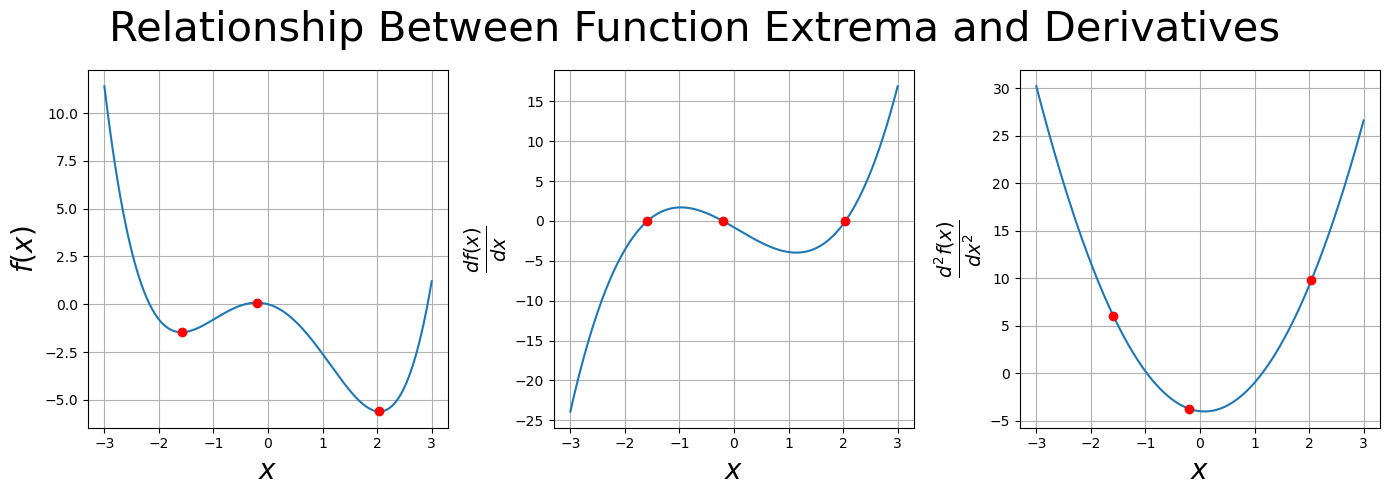

In [7]:
x = sym.Symbol('x')
# Example function
f = .3*x**4 - .1*x**3 -2*x**2 -.8*x 
# first and second derivative 
df = f.diff(x)
ddf=f.diff(x,2) 

# solve for exterma 
x_star = sym.solve(df, x)
# make sure to get real values 
x_star = np.array([ sym.re(val) for val in x_star])
print("extrema values", x_star)

# turn expressions into lambda functions 
f=sym.lambdify(x,f) 
df = sym.lambdify(x,df)
ddf=sym.lambdify(x,ddf) 

x=np.linspace(-3,3,500) 

# make plot 
fig=plt.figure(figsize=(14,5))
fig.suptitle("Relationship Between Function Extrema and Derivatives", size=30) 
ax=fig.add_subplot(131)
ax.set_xlabel(r"$x$", size=20) 
ax.set_ylabel(r"$f(x)$", size=20) 
ax.plot(x, f(x))
ax.plot(x_star, f(x_star), 'o', color="red") 
ax.grid()

ax=fig.add_subplot(132)
ax.set_xlabel(r"$x$", size=20) 
ax.set_ylabel(r"$\frac{df(x)}{dx}$", size=20) 
ax.plot(x, df(x))
ax.plot(x_star, df(x_star), 'o', color="red") 
ax.grid()

ax=fig.add_subplot(133)
ax.set_xlabel(r"$x$", size=20) 
ax.set_ylabel(r"$\frac{d^2f(x)}{dx^2}$", size=20) 
ax.plot(x, ddf(x))
ax.plot(x_star, ddf(x_star), 'o', color="red") 
ax.grid()

plt.tight_layout()

## SymPy to the Rescue (if you forgot your derivatives)

[SymPy](https://www.sympy.org/en/index.html) is a Python library for symbolic mathematics. 
SymPy is a vast library, containing many useful symbolic operations that can be used for scientific computing. I will touch on some of the most basic operations you can perform in SymPy. Of course, you are free to fiddle with SymPy on your own, I am sure you will find many interesting SymPy capabilities. 

First, declare the symbols you will be using with the SymPy symbols function. Write your expression using SymPy functions (for example SymPy.cos). You can take the derivative with the expression.diff() method. Here are some example codes of taking derivatives of $f(x) = x^2 + \sin(x)$,  
\begin{equation} 
\begin{split} 
& f(x) = x^2 + \sin(x) \\
& \frac{df}{dx} = 2x + \cos(x) \\
& \frac{d^2f}{dx^2} = x - \sin(x) \\
& \frac{d^3f}{dx^3} = - \cos(x).
\end{split} 
\end{equation} 

In [8]:
x= sym.symbols("x") # declare a symbol for x

f=x**2 + sym.sin(x)   # symbolic equation 
f

x**2 + sin(x)

In [9]:
# fist derivative of f 
f.diff(x)

2*x + cos(x)

In [10]:
# second derivative of f
f.diff(x,2)

2 - sin(x)

In [11]:
# third derivative of f
f.diff(x,3)

-cos(x)

## Taylor Series 
It would be an understatement to say that the Taylor series is important in numerical methods. In a standard numerical methods course, I feel like you are doing a Taylor series in every class. 

The Taylor series of a continous fucntion is 
\begin{equation}
f(x + \Delta x) = f(x) + f^{(1)}(x)\Delta x + \frac{f^{(2)}(x)}{2!}\Delta x^2 + \frac{f^{(3)}(x)}{3!}\Delta x^3 + \cdots, 
\end{equation}
where $f^{(n)} = \frac{ d^nf}{dx^n}$ is the n-the derivative of $f$. In summation form, the Taylor series is
\begin{equation} 
f(x + \Delta x) = \displaystyle \sum_{n=0}^\infty \frac{1}{n!} f^{(n)}(x) \Delta x^n.
\end{equation} 

What does the Taylor series say? 
* If we know the function and all its derivatives at the point $x$, then we know the function at the point $x + \Delta x$. 
* A Taylor series is a power series representation of the function, i.e., it writes the function as a summation of powers of $\Delta x$

In practice it is often inpractical to take an infinite sum (shocker!). More likely a truncated Taylor series is taken, meaning that the infinite sum is truncated at a particular n-value. Here is series truncated at $n=2$ 
\begin{equation} 
f(x + \Delta x) = f(x) + f^{(1)}(x)\Delta x + \frac{f^{(2)}(x)}{2!}\Delta x^2 + \mathcal{O}(\Delta x^3). 
\end{equation} 
**Example**
The Taylor series for $\sin(x)$ is 
\begin{equation}
\sin x = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!} x^{2n+1}
= x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots.
\end{equation}

Below I plot truncated Taylor series approximations to sin(x). 

In [12]:
x = np.linspace(-2*np.pi, 2*np.pi, 1000) 

y0=x
y1=y0 - x**3/factorial(3) 
y2=y1 + x**5/factorial(5) 
y3=y2 - x**7/factorial(7) 

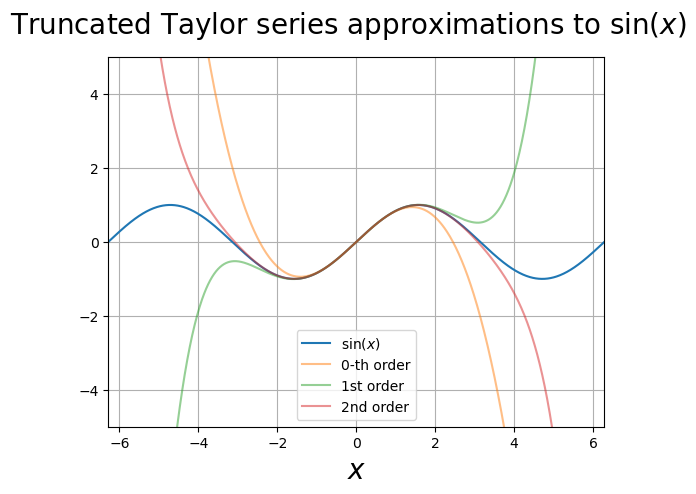

In [13]:
fig=plt.figure()
fig.suptitle(r"Truncated Taylor series approximations to $\sin(x)$", size=20)
ax=fig.add_subplot()
ax.set_ylim(-5,5)
ax.set_xlim(x[0], x[-1]) 
ax.set_xlabel(r"$x$", size=20) 
ax.plot(x, np.sin(x), label =r"$\sin(x)$")
ax.plot(x, y1, alpha=.5, label="0-th order") 
ax.plot(x, y2, alpha=.5, label="1st order") 
ax.plot(x, y3, alpha=.5, label="2nd order") 
ax.grid()
ax.legend()

An example of using SymPy to get the Taylor series expansion of a function. 

In [14]:
# Define the symbol
x = sym.symbols('x')

# sin(x) example 
f = sym.sin(x)

# Taylor series expansion of sin(x) around x = 0 up to order 7
taylor_series = f.series(x, 0, 8)
taylor_series

x - x**3/6 + x**5/120 - x**7/5040 + O(x**8)

In [15]:
# cos(x) example 
f = sym.cos(x)

# Taylor series expansion of cos(x) around x = 0 up to order 7
taylor_series = f.series(x, 0, 8)
taylor_series

1 - x**2/2 + x**4/24 - x**6/720 + O(x**8)

In [16]:
# sigmoid function example 
f = 1/(1 + sym.exp(-x))

# Taylor series expansion for sigmoid function around x = 0 up to order 7
taylor_series = f.series(x, 0, 8)
taylor_series

1/2 + x/4 - x**3/48 + x**5/480 - 17*x**7/80640 + O(x**8)

## Taylor Series with Remainder 


The Taylor series expansion of a function $f(x + \Delta x)$ around a point $ x $ is given by:

\begin{equation} 
f(x + \Delta x) = f(x) + f^{(1)}(x)\Delta x + \frac{f^{(2)}(x)}{2!}\Delta x + \frac{f^{(3)}(x)}{3!}\Delta x^3 + \dots + \frac{f^{(n)}(x)}{n!}\Delta x^n + R_n(x)
\end{equation} 

Where:
- $ R_n(x)$ is the **remainder term** or **error term** that indicates the difference between the exact value and the approximation. 
- The remainder $R_n(x)$ can be written as:

\begin{equation} 
R_n(x) = \frac{f^{(n+1)}(\xi)}{(n+1)!}\Delta x^{n+1}
\end{equation} 

where $\xi $ is some point in the interval between $x$ and $x + \Delta x$.

A general use case is to approximate a function with a truncated Taylor series. The remainder term provides information on how accurate the approximation is. 